In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from string import punctuation
import re
import contractions

In [2]:
# Ustawienie globalnego stylu dla wszystkich wykresów w notebooku
sns.set_theme(style="whitegrid", palette="tab10")

# Ustawienie właściwości siatki
plt.rcParams['axes.facecolor'] = 'white'  # Białe tło wykresów
plt.rcParams['grid.color'] = '#eaeaea'    # Kolor siatki - jasny szary
plt.rcParams['grid.linestyle'] = '-'      # Styl linii siatki - ciągła linia
plt.rcParams['grid.linewidth'] = 1        # Szerokość linii siatki
plt.rcParams['axes.edgecolor'] = 'white'  # Kolor krawędzi osi wykresów
plt.rcParams['axes.spines.top'] = False   # Usunięcie górnej krawędzi
plt.rcParams['axes.spines.right'] = False # Usunięcie prawej krawędzi
plt.rcParams['axes.spines.left'] = False  # Usunięcie lewej krawędzi
plt.rcParams['axes.spines.bottom'] = False# Usunięcie dolnej krawędzi
plt.rcParams['axes.titlepad'] = 20        # Odstęp tytułu wykresu od górnej krawędzi
plt.rcParams['axes.titlesize'] = 16       # Rozmiar czcionki tytułu wykresu
plt.rcParams['axes.labelsize'] = 12       # Rozmiar czcionki etykiet osi
plt.rcParams['xtick.labelsize'] = 12      # Rozmiar czcionki etykiet na osi X
plt.rcParams['ytick.labelsize'] = 12      # Rozmiar czcionki etykiet na osi Y

In [3]:
df = pd.read_csv('the_office_transcript.csv', index_col=0)
df

,season,episode,scene,line,character
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [4]:
def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(f'[{re.escape(punctuation)}]', '', text)
    return text

In [5]:
df['line_preprocessed'] = df['line'].apply(lambda x: preprocess_text(x))
df = df[df['line_preprocessed'].map(lambda d: len(d)) > 0]
df

,season,episode,scene,line,character,line_preprocessed
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,all right jim your quarterlies look very good...
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,oh i told you i could not close it so
2,1,1,1,So you've come to the master for guidance? Is ...,Michael,so you have come to the master for guidance i...
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,actually you called me in here but yeah
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,all right well let me show you how it is done
...,...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,it all seems so very arbitrary i applied for ...
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith,i just feel lucky that i got a chance to share...
59906,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis,i am happy that this was all filmed so i can r...
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim,i sold paper at this company for years my ...


## Analiza sentymentu - TextBlob

In [6]:
from textblob import TextBlob

def get_sentiment_score(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    return sentiment_score

In [7]:
df['sentiment'] = df['line'].apply(get_sentiment_score)

C:\Users\golec\AppData\Local\Temp\ipykernel_15768\338051249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['line'].apply(get_sentiment_score)


In [8]:
df[df['sentiment'] < -0.8]

,season,episode,scene,line,character,line_preprocessed,sentiment
17,1,1,6,My job is to speak to clients on the phone abo...,Jim,my job is to speak to clients on the phone abo...,-1.000000
61,1,1,11,"Oh, my God! Oh! That's... horrifying. Horrible...",Michael,oh my god oh that is horrifying horribl...,-0.966667
644,1,3,14,This is a ridiculously awful plan. Because you...,Pam,this is a ridiculously awful plan because you...,-1.000000
674,1,3,17,You let him walk all over you. It's just pathe...,Angela,you let him walk all over you it is just path...,-1.000000
799,1,3,35,Why did you put Dwight in charge of that? He d...,Pam,why did you put dwight in charge of that he d...,-1.000000
...,...,...,...,...,...,...,...
58325,9,20,11,"Oh yes I did, I told you all. It was..um, caus...",Nellie,oh yes i did i told you all it was um beca...,-1.000000
58682,9,21,33,"Will you tell me bluntly, do you think I am ma...",Andy,will you tell me bluntly do you think i am ma...,-1.000000
58788,9,21,42,"Oh, don't look at me cause I think you're maki...",Jim,oh do not look at me because i think you are ...,-1.000000
59169,9,22,45,"Oh, you know my name. Well, that is shocking. ...",Kevin,oh you know my name well that is shocking,-1.000000


In [9]:
top_characters = list(df['character'].value_counts()[:10].sort_values(ascending=False).index)

In [10]:
mean_sentiment_for_character = df.groupby('character')['sentiment'].mean()

In [11]:
mean_sentiment_for_top_characters = {}

for character in top_characters:
    mean_sentiment_for_top_characters[character] = mean_sentiment_for_character[character]

In [12]:
sentiment_for_character_df = pd.DataFrame(list(mean_sentiment_for_top_characters.items()), columns=['Character', 'Sentiment'])
sentiment_for_character_df = sentiment_for_character_df.sort_values(by=['Sentiment'], ascending=False)
sentiment_for_character_df

,Character,Sentiment
0,Michael,0.102788
2,Jim,0.098211
9,Ryan,0.095802
3,Pam,0.089300
1,Dwight,0.074380
4,Andy,0.072839
7,Erin,0.064676
8,Oscar,0.063925
5,Kevin,0.058727
6,Angela,0.037508


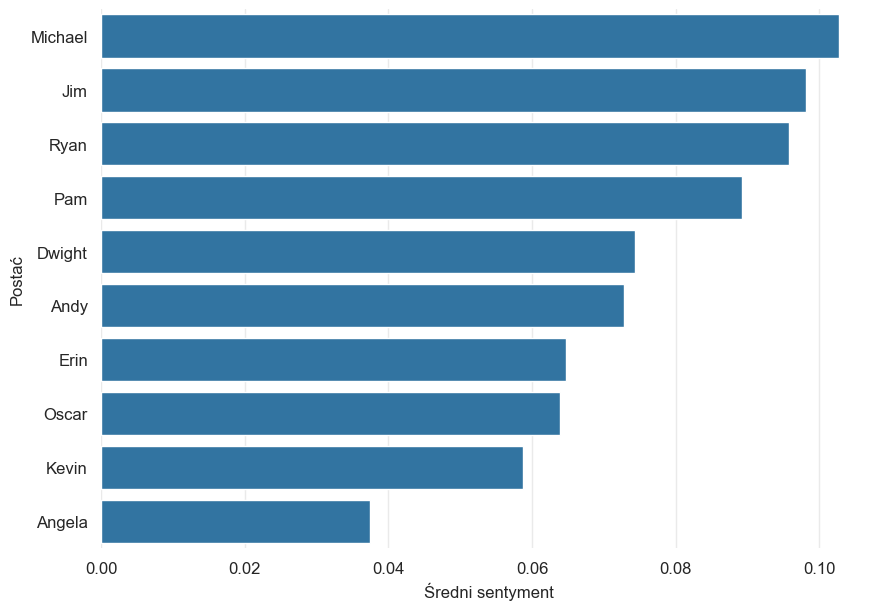

In [13]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Sentiment', y='Character', data=sentiment_for_character_df)
plt.xlabel('Średni sentyment')
plt.ylabel('Postać')
plt.savefig("plots/sentyment_dla_postaci.pdf")

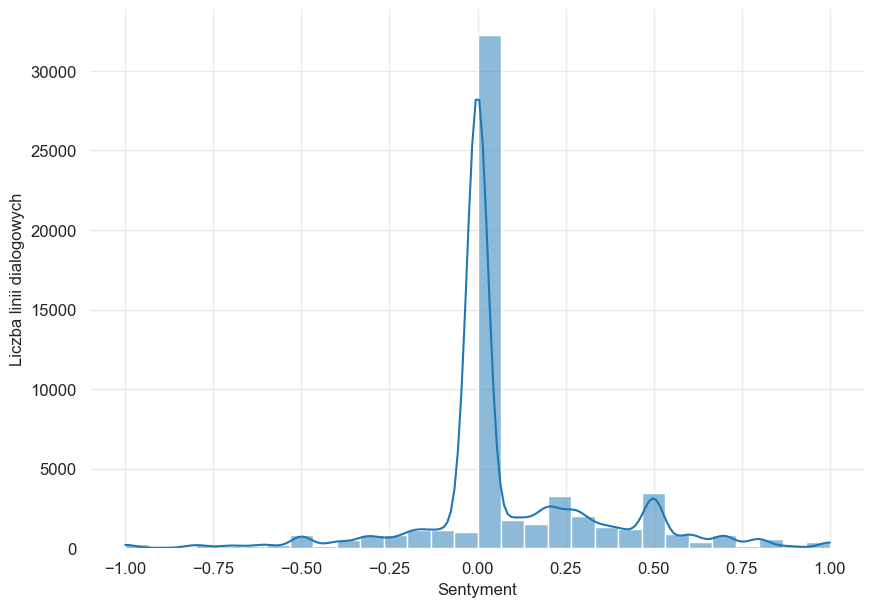

In [14]:
plt.figure(figsize=(10, 7))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentyment')
plt.ylabel('Liczba linii dialogowych')
plt.savefig("plots/sentyment_rozklad.pdf")

C:\Users\golec\AppData\Local\Temp\ipykernel_15768\3735652749.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)


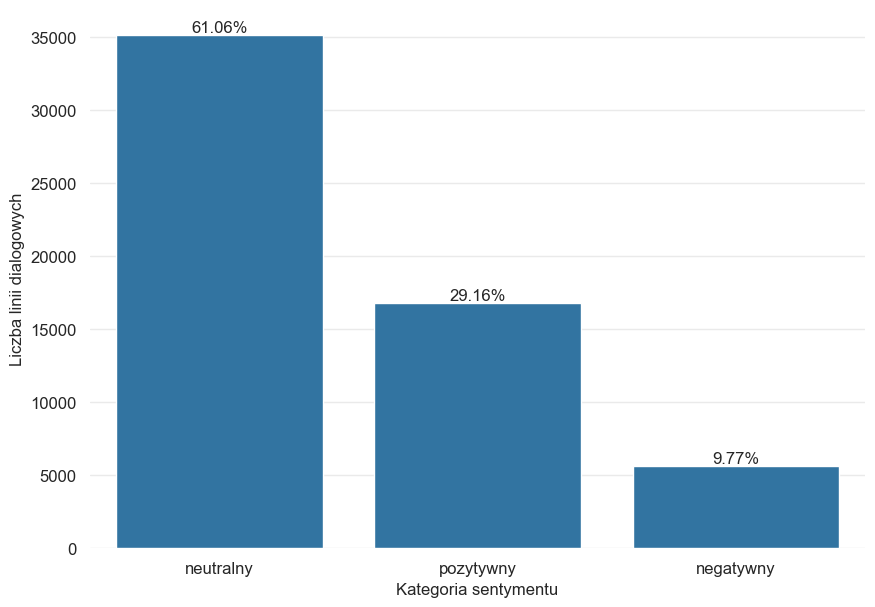

In [15]:
def categorize_sentiment(score):
    if score > 0.1:
        return 'pozytywny'
    elif score < -0.1:
        return 'negatywny'
    else:
        return 'neutralny'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_percentages = df['sentiment_category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 7))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
for i, (count, percentage) in enumerate(zip(sentiment_counts.values, sentiment_percentages.values)):
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')
plt.xlabel('Kategoria sentymentu')
plt.ylabel('Liczba linii dialogowych')
plt.xticks(rotation=0)
plt.savefig("plots/sentyment_rozklad_kategorie.pdf")

In [16]:
df['sentiment_category'].value_counts(normalize=True) * 100

sentiment_category
neutralny    61.064898
pozytywny    29.163121
negatywny     9.771981
Name: proportion, dtype: float64

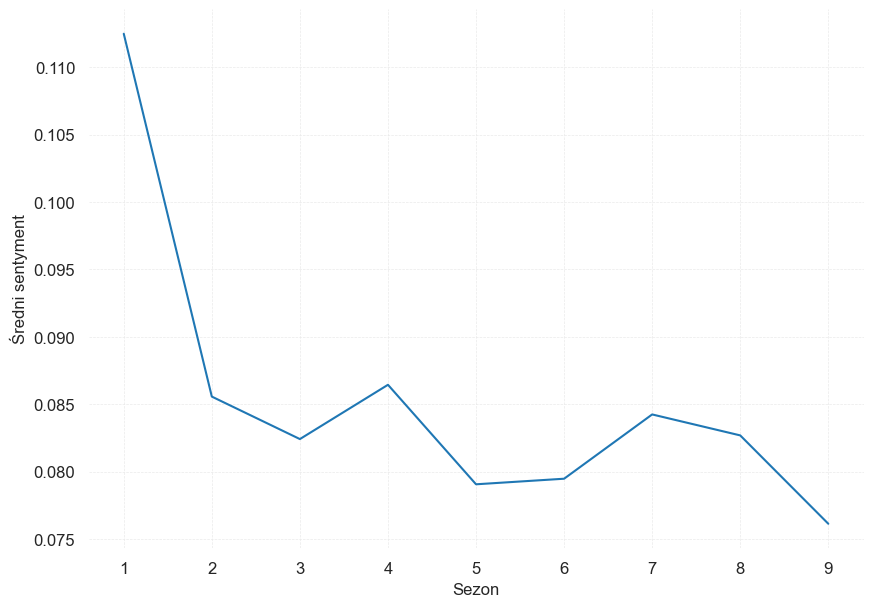

In [17]:
seasonal_sentiment = df.groupby('season')['sentiment'].mean()

plt.figure(figsize=(10, 7))
seasonal_sentiment.plot()
# plt.title('Sentiment Over Seasons', fontsize=16)
plt.xlabel('Sezon', fontsize=12)
plt.ylabel('Średni sentyment', fontsize=12)
plt.xticks(range(1, len(seasonal_sentiment)+1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("plots/sentyment_sezony.pdf")

In [18]:
mean_sentiment_per_season = df.groupby(['character', 'season']).sentiment.mean().reset_index()
mean_sentiment_per_season

,character,season,sentiment
0,(Pam's mom) Heleen,6,0.000000
1,3rd Athlead Employee,9,0.000000
2,4th Athlead Employee,9,0.300000
3,A.J.,5,0.126190
4,AJ,5,0.054384
...,...,...,...
1150,[Clark and Pete are shown on screen]\nVideo An...,9,0.000000
1151,[repeats]\nAndy: Fail,9,0.000000
1152,abe,7,0.000000
1153,sAndy,4,0.625000


In [19]:
threshold = 5  
quote_counts = df.groupby(['character', 'season']).size()

to_remove = quote_counts[quote_counts < threshold].reset_index()
df = df.reset_index(drop=True)

for index, row in to_remove.iterrows():
    df = df[~((df['character'] == row['character']) & (df['season'] == row['season']))]

In [20]:
mean_sentiment_per_season = df.groupby(['character', 'season']).sentiment.mean().reset_index()
mean_sentiment_per_season

,character,season,sentiment
0,A.J.,5,0.126190
1,AJ,5,0.054384
2,AJ,7,0.176250
3,Abby,2,0.037500
4,Ad guy 1,4,0.198611
...,...,...,...
464,Wendy's phone operator,4,0.040000
465,Wolf,9,0.039426
466,Woman,4,0.140000
467,Worker,1,-0.222679


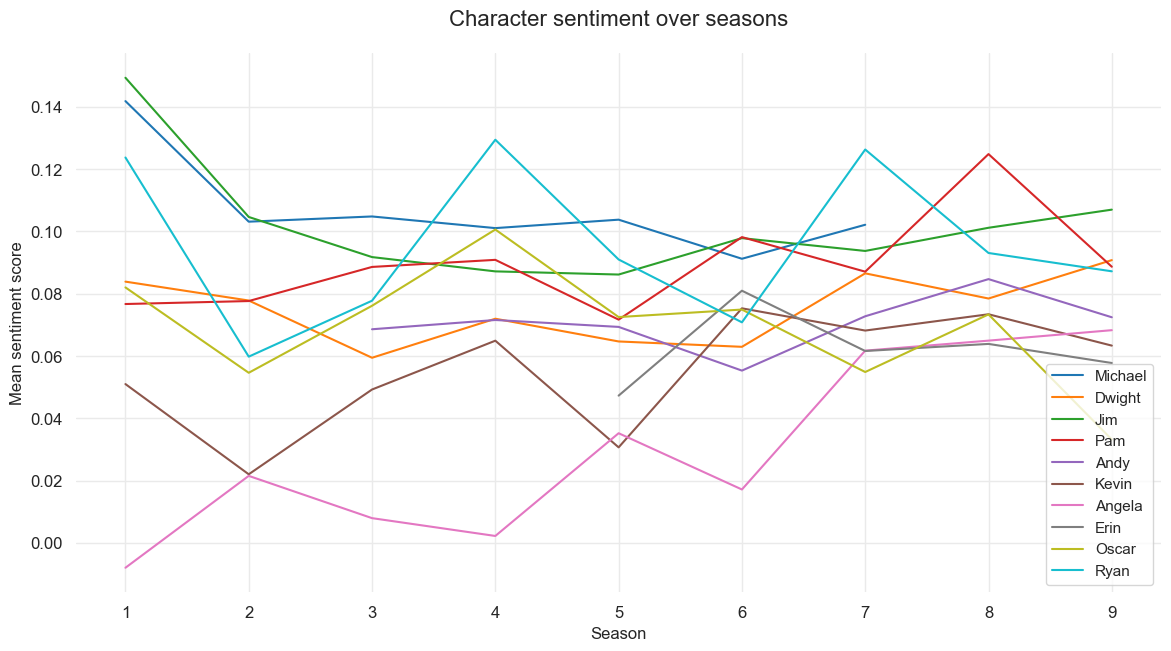

In [21]:
plt.figure(figsize=(14,7))

for character in top_characters:
    subset = mean_sentiment_per_season[mean_sentiment_per_season['character'] == character]
    plt.plot(subset['season'], subset['sentiment'], label=character)

plt.legend()
plt.title("Character sentiment over seasons")
plt.xlabel("Season")
plt.ylabel("Mean sentiment score")
plt.show()

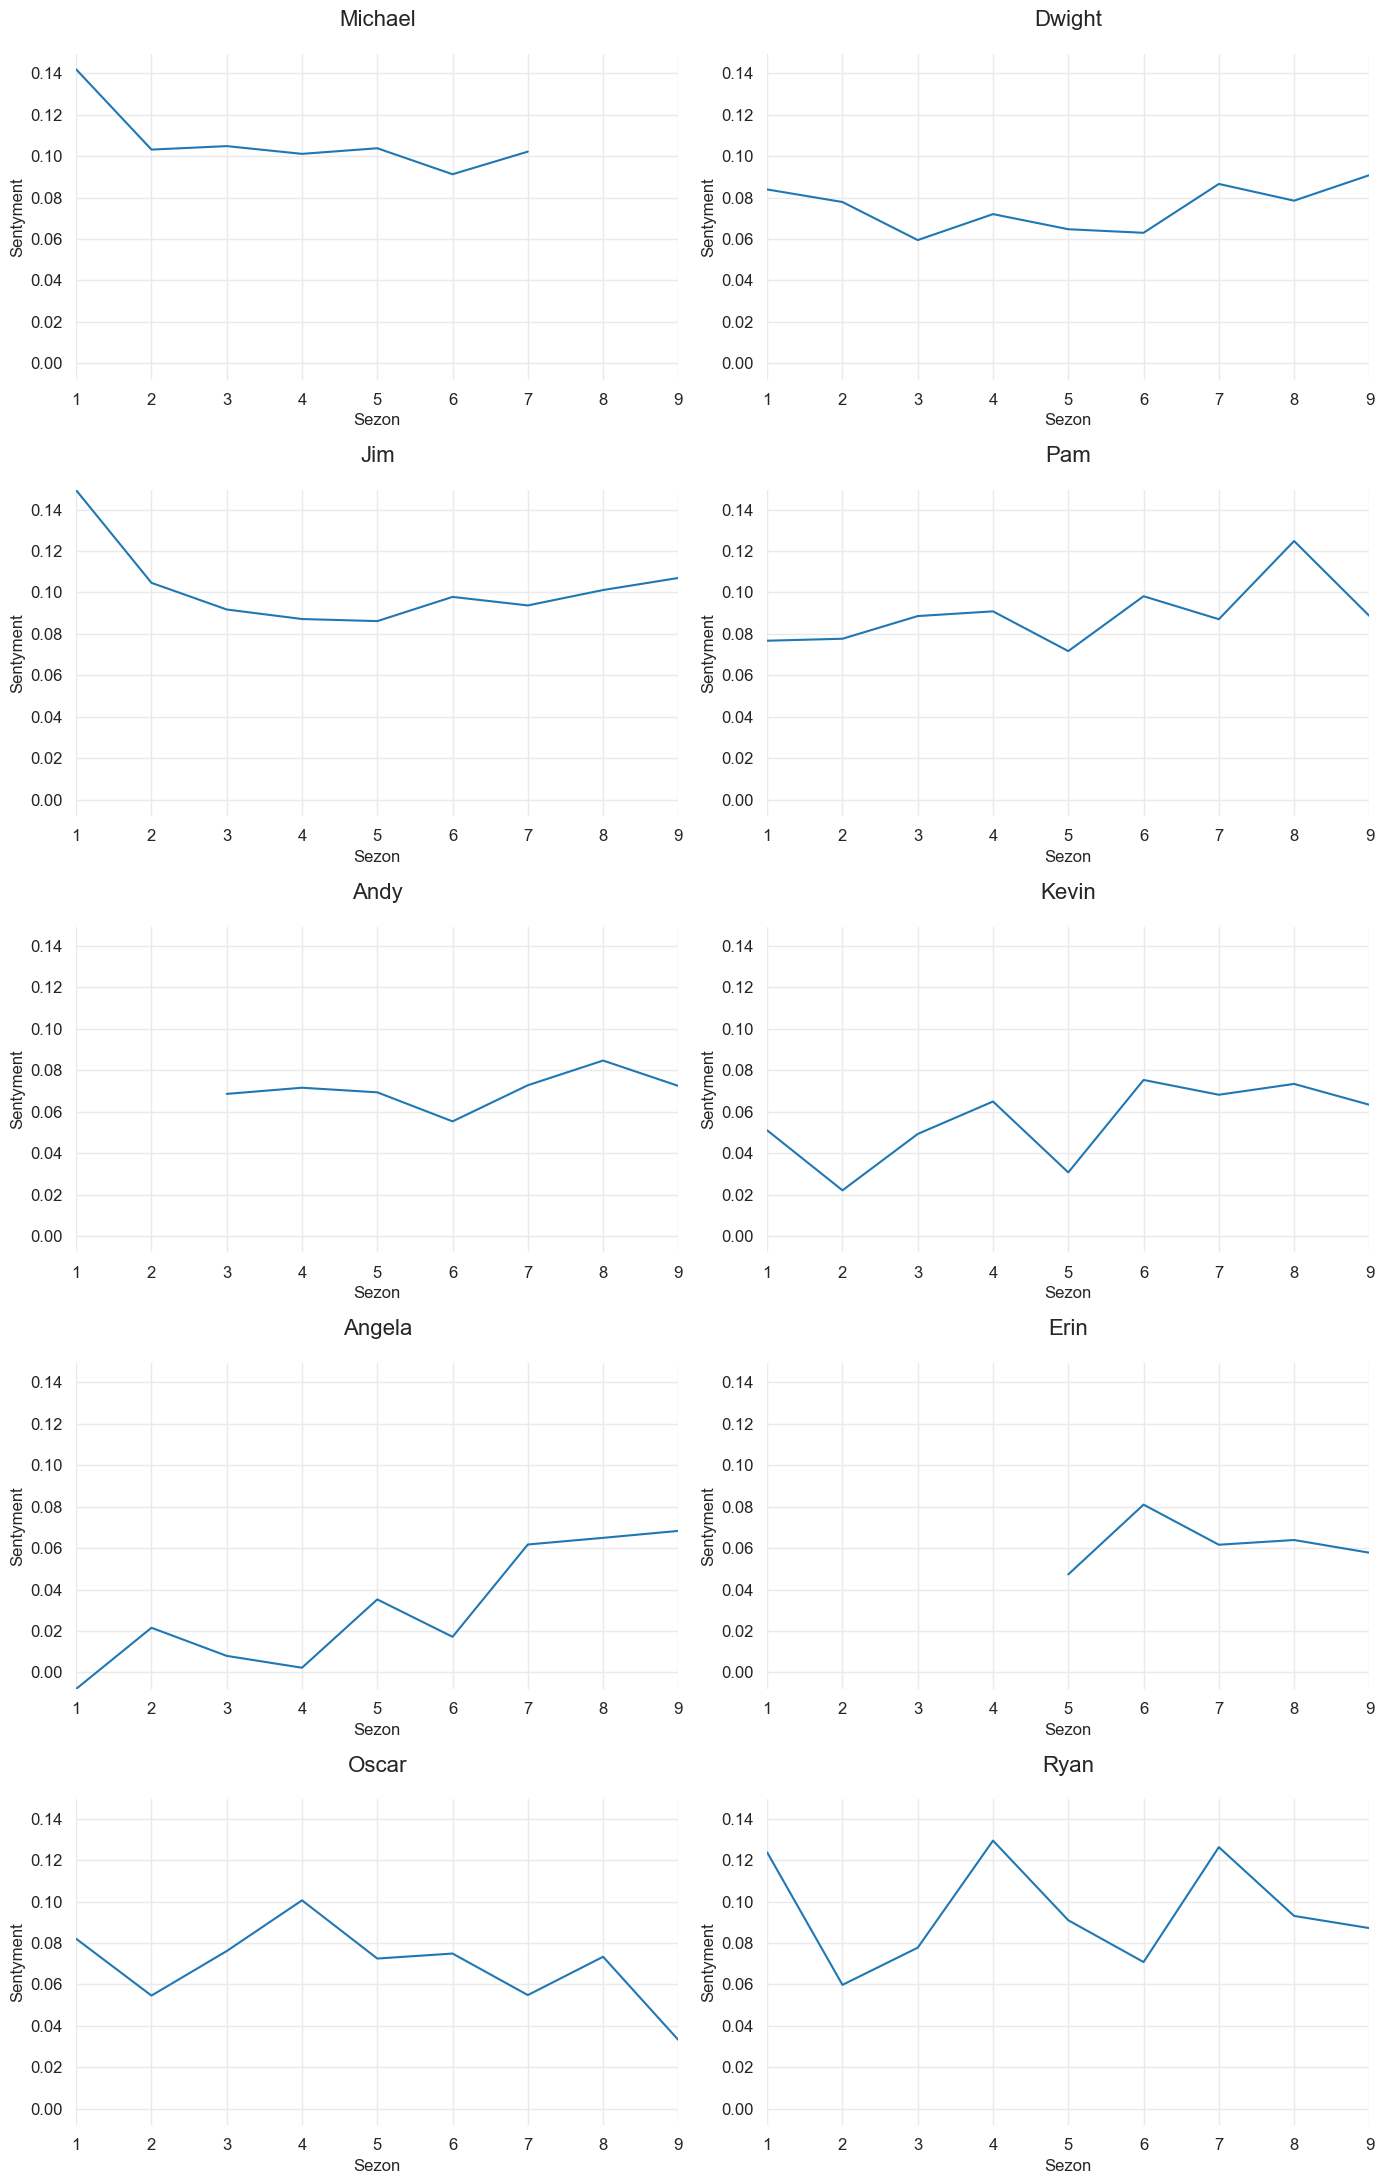

In [22]:
filtered_df = mean_sentiment_per_season[mean_sentiment_per_season['character'].isin(top_characters)]

global_min = filtered_df['sentiment'].min()
global_max = filtered_df['sentiment'].max()

fig, axs = plt.subplots(5, 2, figsize=(14, 22))
index = 1
for index, character in enumerate(top_characters):
    ax = axs[index // 2, index % 2]
    data_character = mean_sentiment_per_season[mean_sentiment_per_season['character'] == character]
    sns.lineplot(x='season', y='sentiment', data=data_character, ax=ax)
    ax.set_ylim(global_min, global_max)
    ax.set_title(character)
    ax.set_ylabel('Sentyment')
    ax.set_xlabel('Sezon')
    ax.set_xlim(1, 9)
    index += 1

# plt.suptitle('Character sentiment over seasons', fontsize=24)
fig.tight_layout()
plt.savefig("plots/sentyment_postaci_zmiany.pdf")

## Analiza emocji -  model "emotion_text_classifier" z Hugging Face
Trenowanie modelu na Google Colab ze względu na GPU

In [23]:
sentiment_mapping = {
    'negatywny': 0,
    'neutralny': 1,
    'pozytywny': 2
}

df['sentiment_category'] = df['sentiment_category'].map(sentiment_mapping)

In [24]:
df

,season,episode,scene,line,character,line_preprocessed,sentiment,sentiment_category
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,all right jim your quarterlies look very good...,0.597857,2
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,oh i told you i could not close it so,0.000000,1
2,1,1,1,So you've come to the master for guidance? Is ...,Michael,so you have come to the master for guidance i...,0.000000,1
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,actually you called me in here but yeah,0.000000,1
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,all right well let me show you how it is done,0.285714,2
...,...,...,...,...,...,...,...,...
57578,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,it all seems so very arbitrary i applied for ...,-0.057500,1
57579,9,23,113,I just feel lucky that I got a chance to share...,Meredith,i just feel lucky that i got a chance to share...,0.166667,2
57580,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis,i am happy that this was all filmed so i can r...,0.322222,2
57581,9,23,115,I sold paper at this company for 12 years. My ...,Jim,i sold paper at this company for years my ...,0.060000,1


In [25]:
# df.to_csv('df_sentiment.csv')
# df

In [26]:
# Wczytanie danych przetworzonych na Google Colab
df = pd.read_csv('df_emotions.csv', index_col=0)
df.head()

,season,episode,scene,line,character,line_preprocessed,sentiment,sentiment_category,predicted_emotion
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,all right jim your quarterlies look very good...,0.597857,NaN,neutral
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,oh i told you i could not close it so,0.000000,NaN,neutral
2,1,1,1,So you've come to the master for guidance? Is ...,Michael,so you have come to the master for guidance i...,0.000000,NaN,neutral
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,actually you called me in here but yeah,0.000000,NaN,neutral
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,all right well let me show you how it is done,0.285714,NaN,neutral


In [27]:
emotions_dict = {
    "neutral": "neutralność",
    "joy": "radość",
    "anger": "złość",
    "sadness": "smutek",
    "fear": "strach",
    "surprise": "zaskoczenie",
    "disgust": "wstręt"
}

df["predicted_emotion"].replace(emotions_dict, inplace=True)
df

,season,episode,scene,line,character,line_preprocessed,sentiment,sentiment_category,predicted_emotion
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,all right jim your quarterlies look very good...,0.597857,NaN,neutralność
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,oh i told you i could not close it so,0.000000,NaN,neutralność
2,1,1,1,So you've come to the master for guidance? Is ...,Michael,so you have come to the master for guidance i...,0.000000,NaN,neutralność
3,1,1,1,"Actually, you called me in here, but yeah.",Jim,actually you called me in here but yeah,0.000000,NaN,neutralność
4,1,1,1,"All right. Well, let me show you how it's done.",Michael,all right well let me show you how it is done,0.285714,NaN,neutralność
...,...,...,...,...,...,...,...,...,...
57578,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,it all seems so very arbitrary i applied for ...,-0.057500,NaN,neutralność
57579,9,23,113,I just feel lucky that I got a chance to share...,Meredith,i just feel lucky that i got a chance to share...,0.166667,NaN,radość
57580,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis,i am happy that this was all filmed so i can r...,0.322222,NaN,radość
57581,9,23,115,I sold paper at this company for 12 years. My ...,Jim,i sold paper at this company for years my ...,0.060000,NaN,radość


In [28]:
df['predicted_emotion'].value_counts(normalize=True) * 100

predicted_emotion
neutralność    64.923082
radość         11.149949
zaskoczenie    10.951223
wstręt          4.187441
złość           4.176795
smutek          2.943629
strach          1.667879
Name: proportion, dtype: float64

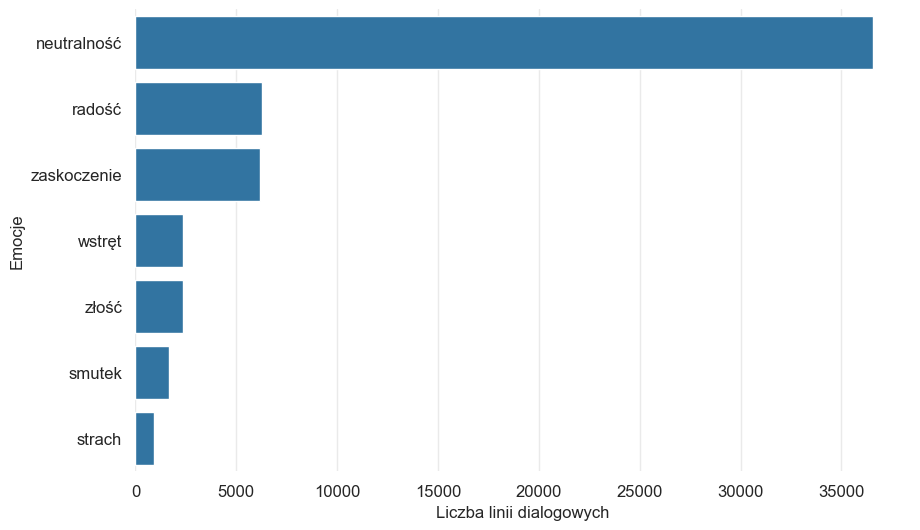

In [29]:
emotion_counts = df['predicted_emotion'].value_counts()
emotion_percentages = df['predicted_emotion'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index)
plt.ylabel('Emocje')
plt.xlabel('Liczba linii dialogowych')
plt.savefig("plots/emocje_slupkowy.pdf")

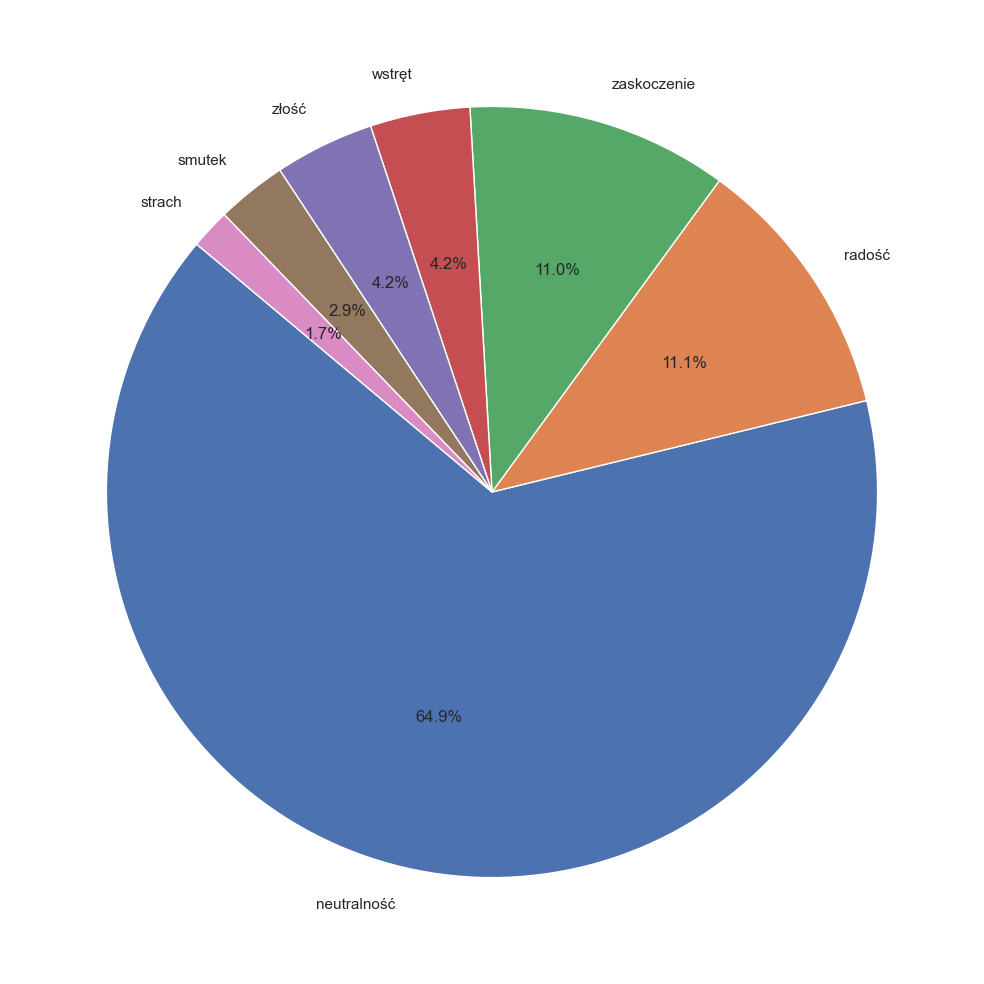

In [30]:
import seaborn as sns

emotion_counts = df['predicted_emotion'].value_counts()

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.savefig("plots/emocje_kolowy.pdf")

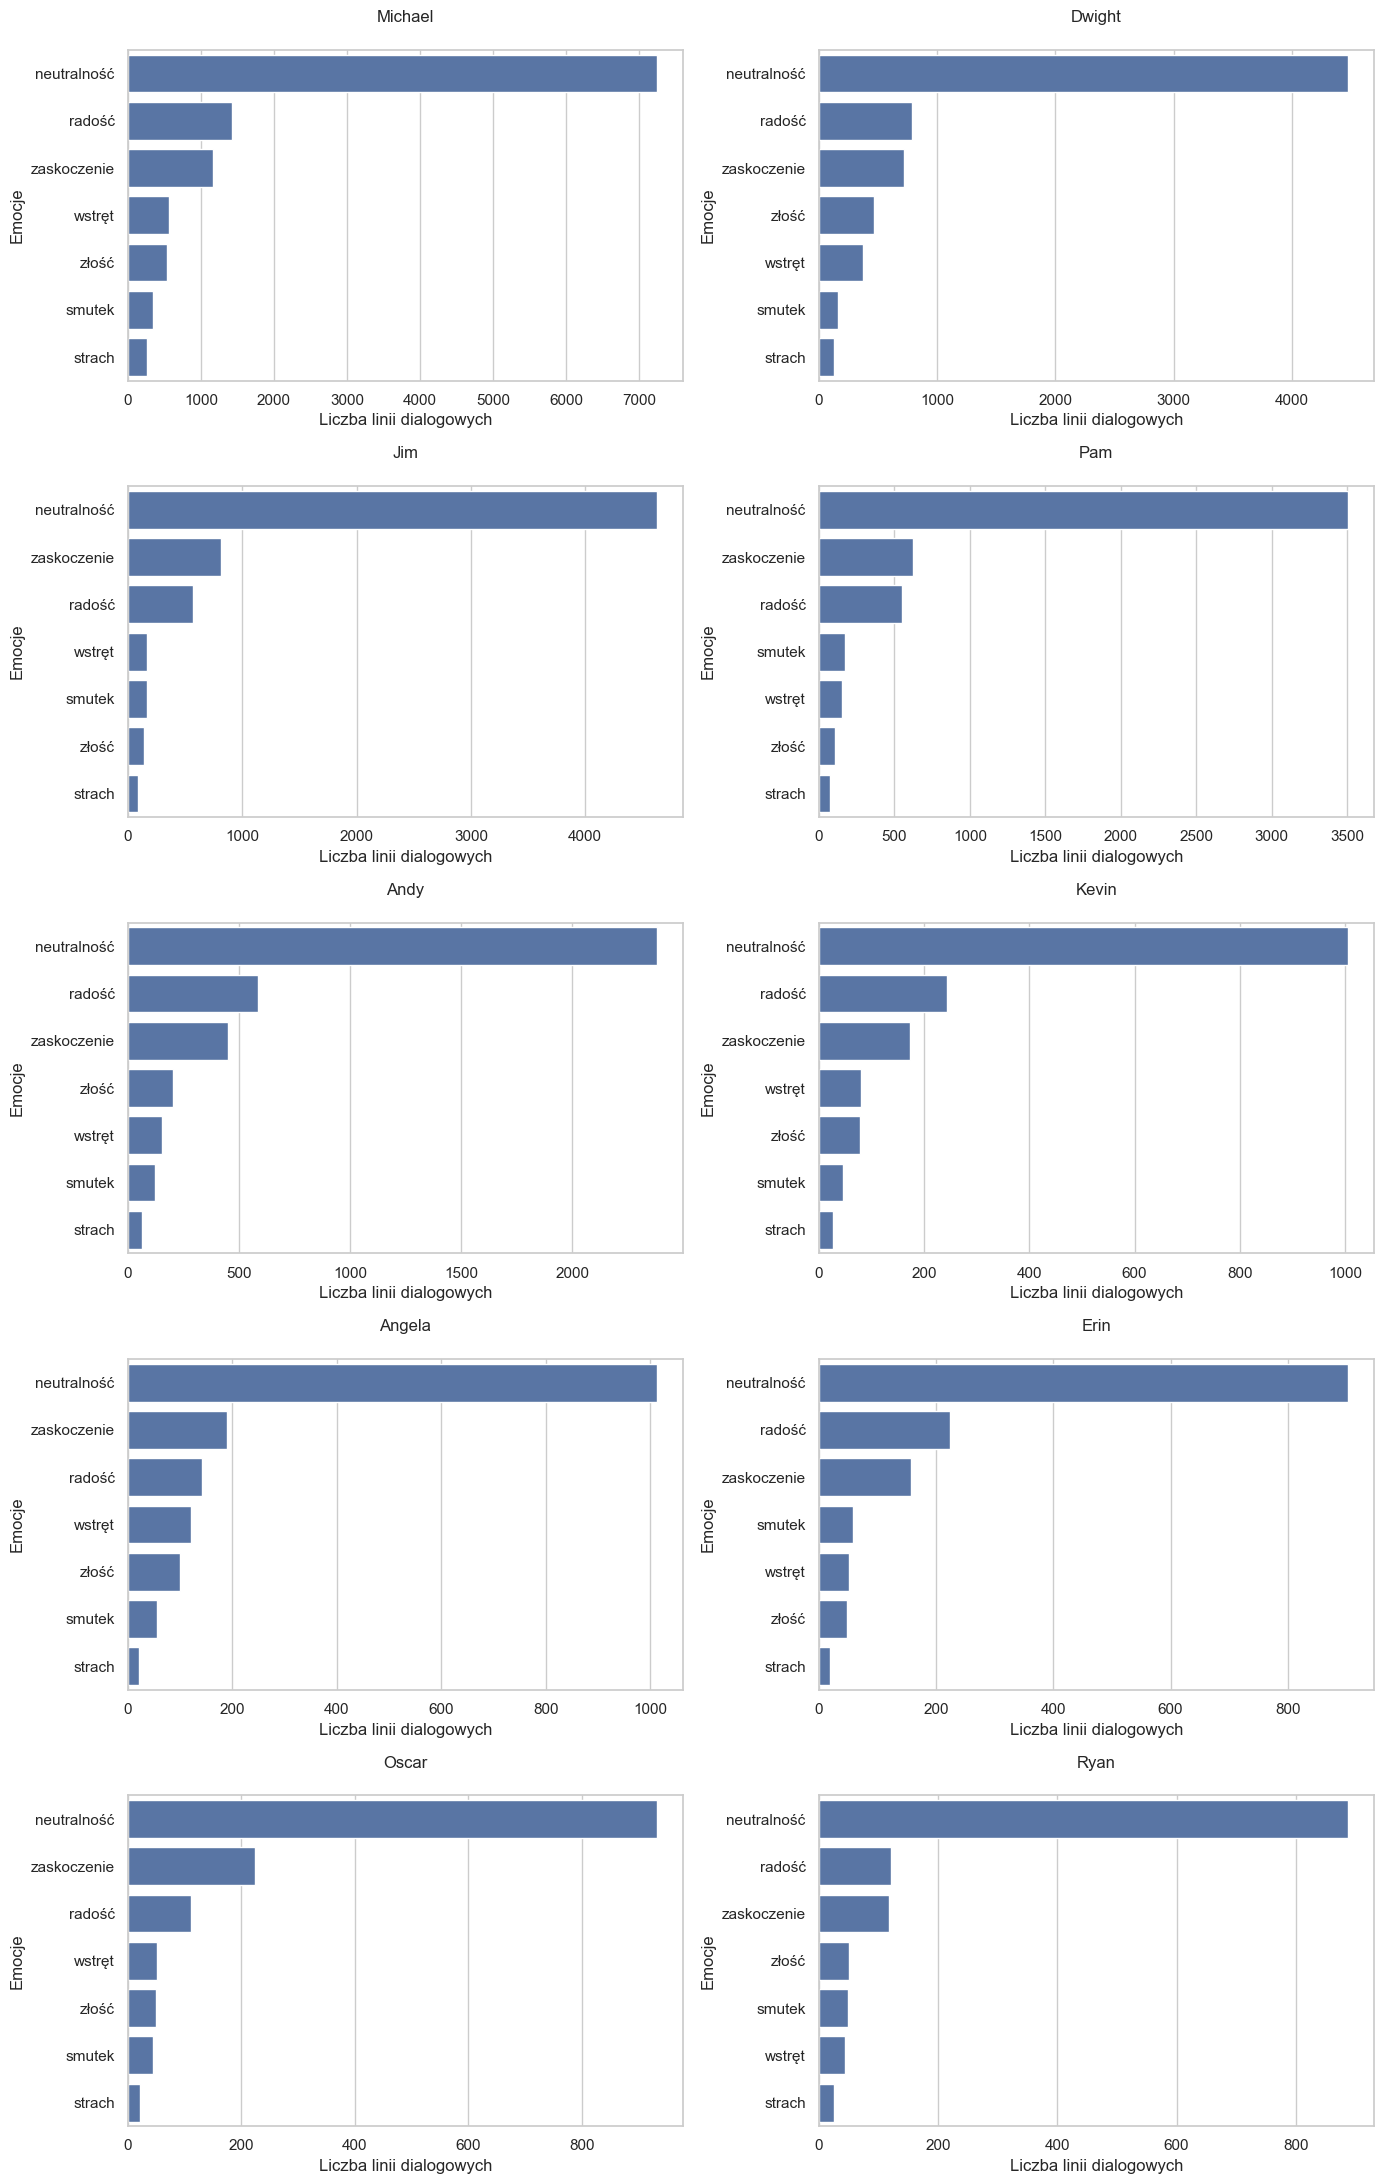

In [31]:
fig, axs = plt.subplots(len(top_characters)//2, 2, figsize=(14, 22)) 

for index, character in enumerate(top_characters):
    character_df = df[df['character'] == character]
    
    emotion_counts = character_df['predicted_emotion'].value_counts()
    
    ax = axs[index // 2, index % 2] 
    sns.barplot(x=emotion_counts.values, y=emotion_counts.index, ax=ax)
    ax.set_title(character)
    ax.set_xlabel('Liczba linii dialogowych')
    ax.set_ylabel('Emocje')

fig.tight_layout()
plt.show() 